In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# データセットの生成

In [2]:
# forgeデータセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


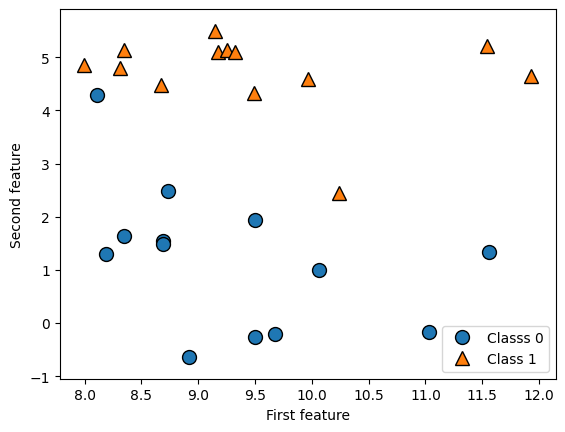

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Classs 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
# waveデータセットの生成
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

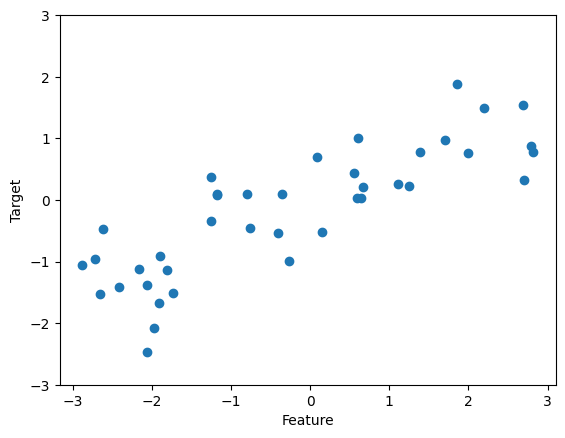

In [5]:
# データセットをプロット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# cancerデータセットの生成
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n{}".format(cancer.keys()))

cancer.key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# データセットの確認
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# boston_housingデータセットの生成
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
# boston_housingデータセット生成関数の定義
# https://stackoverflow.com/questions/57645829/why-am-i-getting-a-syntaxwarning-invalid-escape-sequence-s-warning
# https://wayama.io/article/library/sklearn/datasets/
# https://bbengfort.github.io/2016/04/bunch-data-management/
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [10]:
boston = load_boston()
# print(boston.keys())
# print(boston.data)
# print(boston.target)
# print(boston.frame)
# print(boston.target_names)
# print(boston.feature_names)
# print(boston.DESCR)
print(type(boston))
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(data=boston.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (506, 13)
Target shape: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
# print(california.keys())
# print(california.data)
# print(california.target)
# print(california.frame)
# print(california.target_names)
# print(california.feature_names)
# print(california.DESCR)
print(type(california))
print("Data shape: {}".format(california.data.shape))
print("Target shape: {}".format(california.target.shape))

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedianHouseValue'] = pd.DataFrame(data=california.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Target shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 特徴量の交互作用も含めたデータの読み込み
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# 決定木
- クラス分類および回帰タスクに広く用いられるモデル
- 決定木では、YES/NO（二値の結合）で答えられる質問（特徴量）で構成された階層的な木構造を学習する
    - 二値の結合をもつ決定木は二分木（Binary tree）と呼ばれる
    - 多値の結合をもつ決定木は、多分木（Multi-branch tree）や、N分木（N-ary tree）と呼ばれる
- 決定木の特徴は、特徴量が並列ではなく階層的な構造を持っていること（ANNとの違いは？）
- 一つの決定木で、多値クラスの分類（複数の終端ノード（葉/リーフ）に対応）ができる
- 決定木の学習では、最短で終端ノードに到達できるような、中間ノードの質問（テスト）を学習する
    - 連続値に対するテストは「特徴量iは値aよりも大きいか？」のような形になる
    - 値aを決定することが決定木の学習となる
    - 回帰タスクでの予測におけるデータポイントに対する出力は、終端ノードに属する訓練データポイントの平均値になる
- 決定木の複雑さの制御には以下の2つの戦略がある
    - 事前枝刈り（pre-pruning）：構築過程で木の生成を早めに止める
        - 木構造の深さを制限する、葉の最大数を制限する、データポイントの最小数を制限する
    - 事後枝刈り（post-pruning）：一度木を構築してから情報の少ないノードを削除する

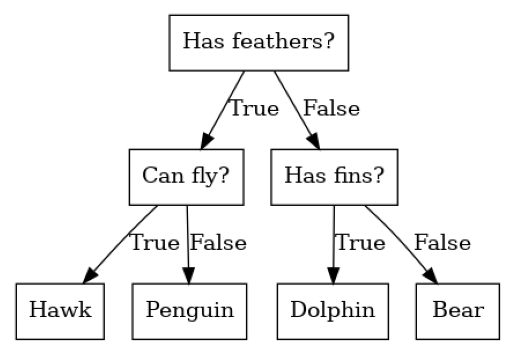

In [13]:
# 木構造の表現
mglearn.plots.plot_animal_tree()

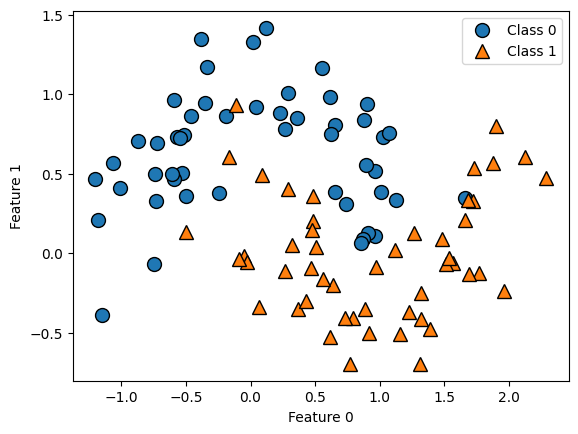

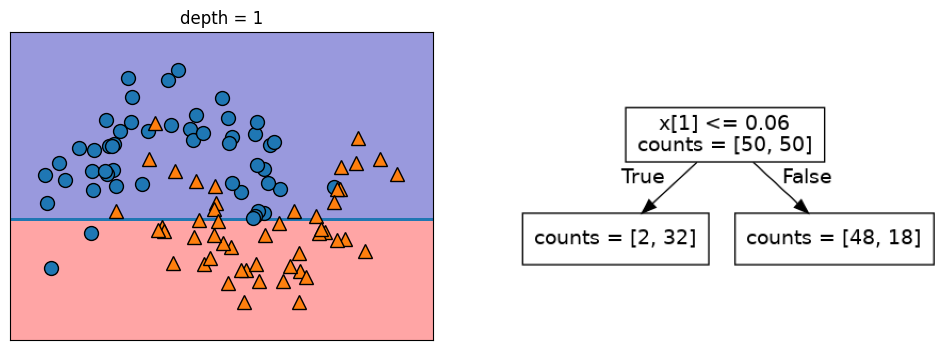

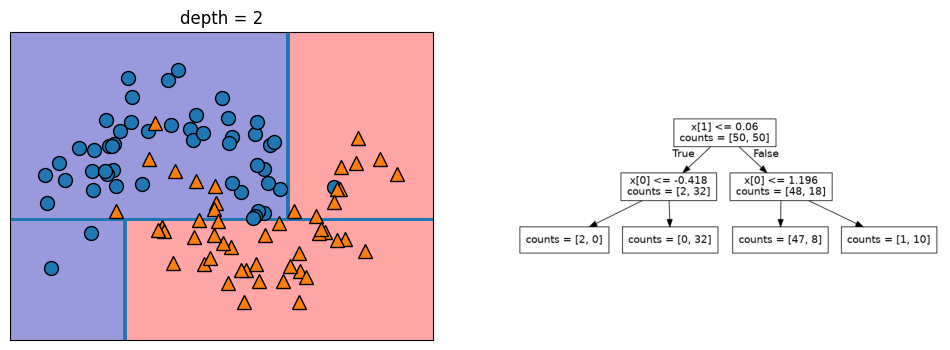

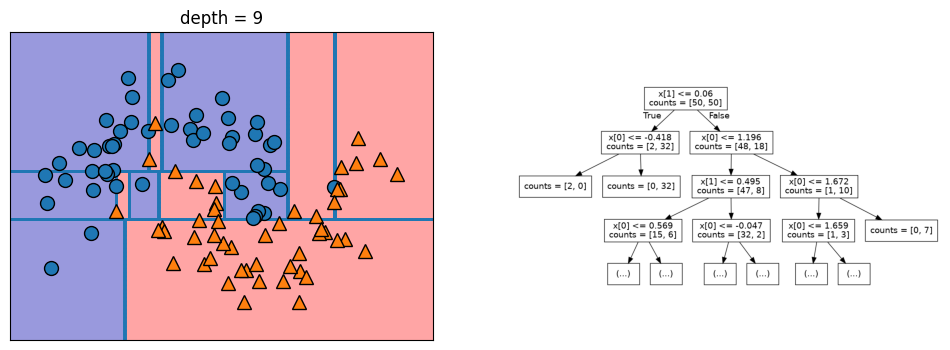

In [14]:
# Two moonsデータの分類
# https://github.com/amueller/introduction_to_ml_with_python/tree/master
mglearn.plots.plot_tree_progressive()

## 決定木によるクラス分類

In [15]:
# cancerデータセットの分類
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [16]:
# 木の深さの制限による過剰適合の防止
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [17]:
# 決定木のグラフ化
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

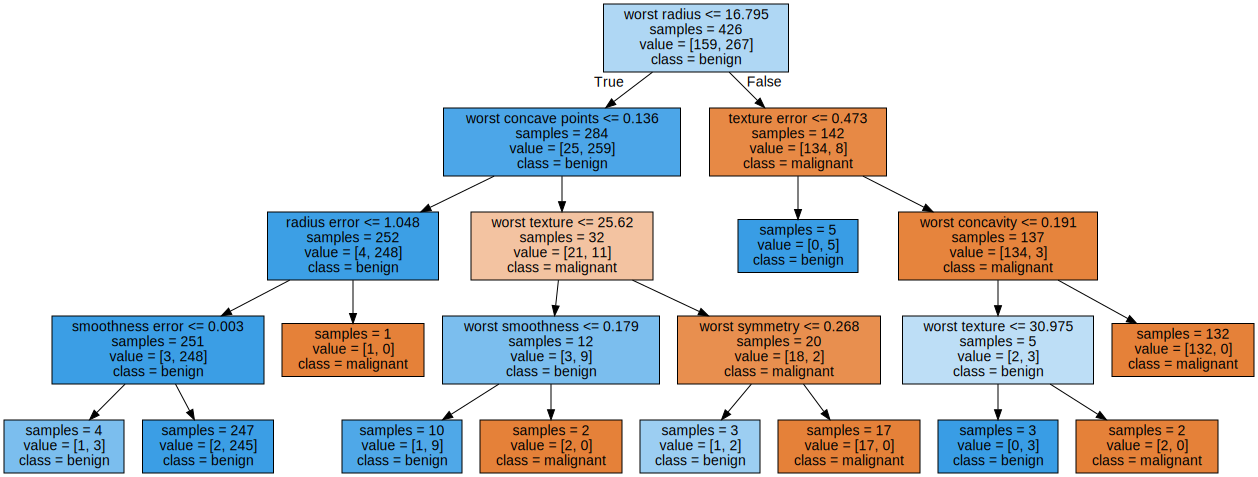

In [18]:
# グラフの表示
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- ルートの特徴量worst radiusで分別した結果
    - 左
        - サンプル数：142
        - クラス0（悪性）：134
        - クラス1（良性）：8
    - 右
        - サンプル数：284
        - クラス0（悪性）：25
        - クラス1（良性）：259
- 評価値
| 予測\結果 | 陽性 | 陰性 |
|-|-|-|
| 陽性 | 134 | 8 |
| 陰性 | 25 | 259 |
    - Precition = 134/(134+8) = 0.944
    - Recall = 134/(134+25) = 0.843

In [19]:
# 特徴量の重要度（feature importance）
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


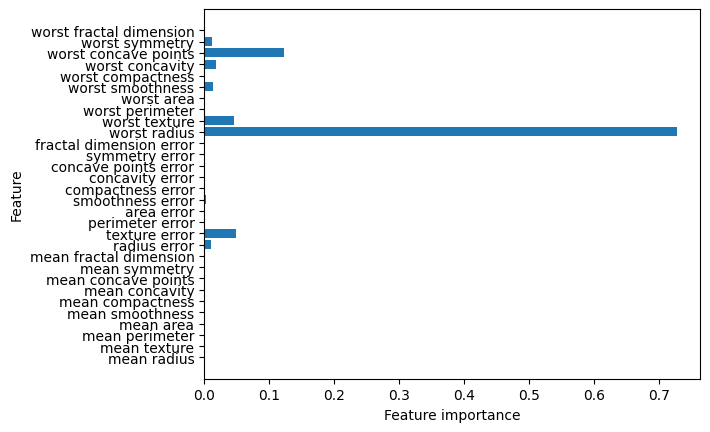

In [20]:
# 特徴量の重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


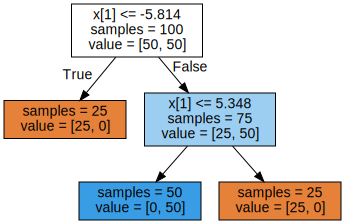

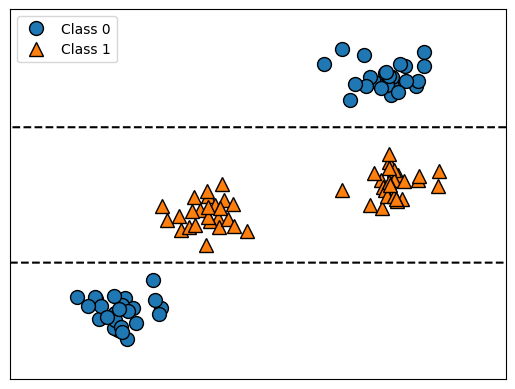

In [21]:
# 重要度の高い特徴量の大小が、予測結果のクラスを示すわけではない例
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## 決定木による回帰

Text(0, 0.5, 'Price in $/Mbyte')

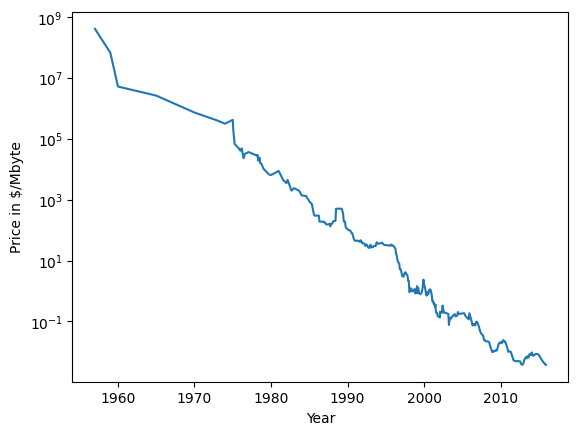

In [22]:
# RAM価格の履歴データセットを使った決定木による推定
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [23]:
# DecisionTreeRegressorとLinearRegressionの比較（決定木では外挿ができないことの確認）
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
# 参考：https://note.com/dotkitsunet/n/ncb9ec30ebca0
X_train = data_train.date.to_numpy()[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# すべての価格を予想
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

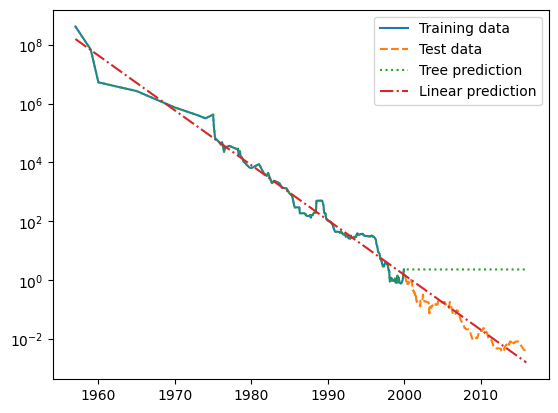

In [24]:
# グラフを表示
plt.semilogy(data_train.date, data_train.price, "-", label="Training data")
plt.semilogy(data_test.date, data_test.price, "--", label="Test data")
plt.semilogy(ram_prices.date, price_tree, ":", label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, "-.", label="Linear prediction")
plt.legend()

## 利点と欠点とパラメータ
- 利点
    - 結果のモデルが容易に可視化可能なため、専門家でなくても理解できる
    - データのスケールに対して完全に不変である
        - 特徴量の正規化や標準化が必要ない
        - 二値特徴量と連続値特徴量が混ざっている場合でも機能する
- 欠点
    - 事前枝刈りを行なっても過剰適合しやすい
    - 汎化性能が低い傾向がある → アンサンブル法を用いることで改善できる
- パラメータ
    - 事前枝刈り：max_depth, max_leaf_nodes, min_samples_leaf
    - 事後枝刈りの情報がないので追加調査必要

# 決定木のアンサンブル法
- アンサンブル法（Ensembles）とは、複数の機械学習モデルを組み合わせることで、より強力なモデルを構築する方法
- ランダムフォレストと勾配ブースティング決定木が知られている

## ランダムフォレスト
- 複数の決定木の構築に乱数を導入して、異なる決定木が互いに異なるようにする
- データポイントをランダムに選択する方法（ブートストラップサンプリング）と、分岐テストに用いる特徴を選択（特徴量のサブセットに対する分割）する方法がある
- n_estimators, n_samples, max_featuresをパラメータとして設定する
- max_featuresを小さくすると学習データへの適合率が低く（汎化性能が高く）なり、大きくすると高く（汎化性能低く）なる
- クラス分類の場合は「ソフト投票」を行い、回帰の場合は平均値を最終的な予測とする
- ソフト投票では、すべての決定木による確率予想を平均し、最も確率が高いラベルが予想値となる

In [25]:
# two_moonsデータへのランダムフォレストの適用
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

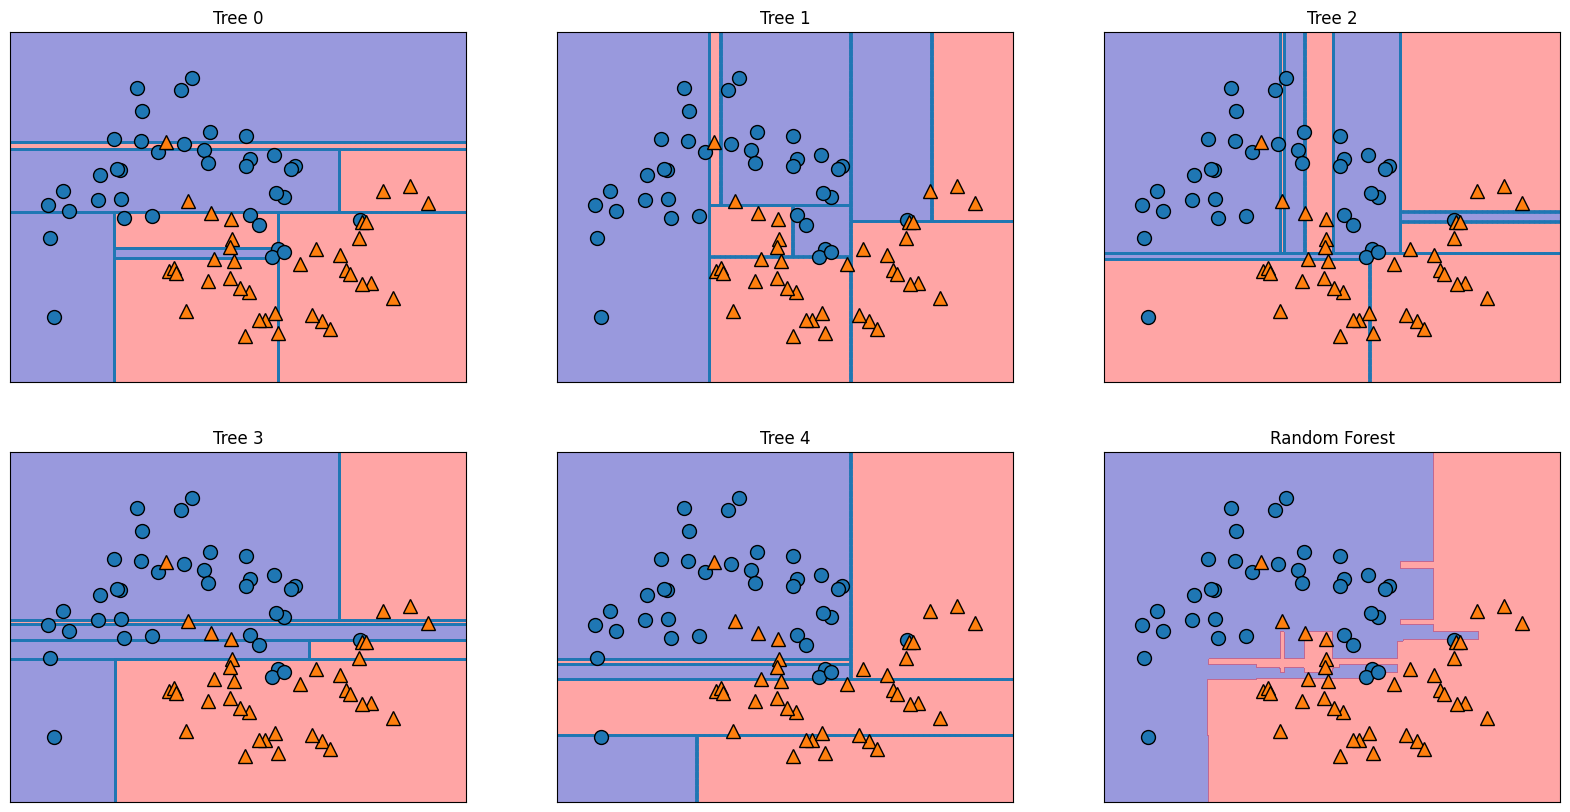

In [26]:
# すべての決定木の分類結果の表示
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [27]:
# cancerデータセットに対して100個の決定木を用いたランダムフォレストを適用した場合
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


n_estimators: 100


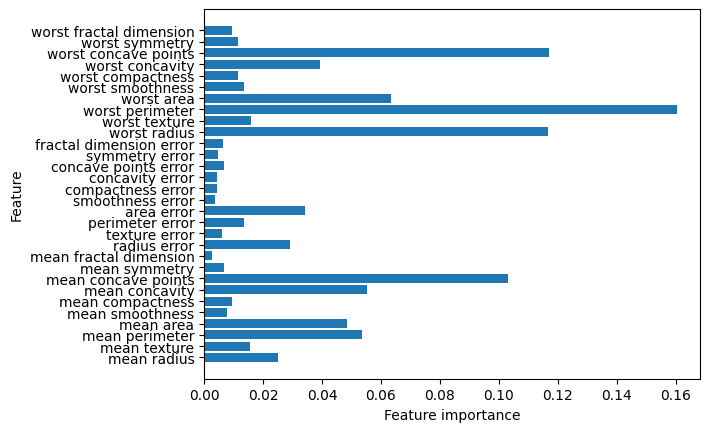

In [28]:
# ランダムフォレストによる特徴量の重要度
# 特徴量の重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

print("n_estimators: {}".format(forest.n_estimators))
plot_feature_importances_cancer(forest)

## ランダムフォレストの利点・欠点・パラメータ
- 利点
    - あまりパラメータチューニングをせずに使える
    - データのスケール変換をする必要がない
    - 簡単に並列化ができる（CPUコア数を増やすと線型に速度が向上する）
    - 非常に大きいデータセットに対しても機能する
- 欠点
    - 決定木よりも決定プロセスが複雑になる
    - 決定木よりも階層が深くなる傾向がある
    - 乱数のシードを変えると構築されるモデルが大きく変わる可能性がある
    - テキストデータなどの、非常に高次元で疎なデータに対してはうまく機能しない ← <font color="red">なぜそうなるのか調査が必要</font>
    - 線型モデルと比較して多くのメモリが必要
    - 線型モデルと比較して訓練と予測が遅い
- パラメータ
    - 予測器の個数：n_estimators → 時間とメモリのある限り大きくする
    - 選択する特徴量の最大数：max_features (デフォルト値は、クラス分類ではsqrt(n_features)、回帰ではn_features)
    - 事前枝刈り：max_depth, max_leaf_nodes, min_samples_leaf → 訓練や予測にかかる時間を縮める効果もある

# 勾配ブースティング回帰木（勾配ブースティングマシン）
- 複数の決定木を組み合わせてより強力なモデルを構築する手法の一つ
- クラス分類と回帰タスクに利用できる
- <font color="red">1つ前の決定木の誤りを次の決定木が修正するように</font>して、決定木を順番に作っていく
- 強力な事前枝刈りによる浅い決定木（弱学習機）を多数組み合わせて性能を向上させる
- ランダムフォレストに比べてパラメータの設定に影響を受けやすい
- パラメータさえ正しく設定されていれば、ランダムフォレストよりも良い性能を示す
- 事前枝刈りのパラメータ、決定木の数（n_estimators）、学習率（learning_rate）を設定する
- 決定木の数や学習率を大きくすると個々の決定木が複雑になる

In [29]:
# cancerデータセットに勾配ブースティング回帰木を適用する
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [30]:
# より強力な事前枝刈りを適用して、過剰適合を防ぐ
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [31]:
# 学習率を下げて、過剰適合を防ぐ
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


n_estimators: 100


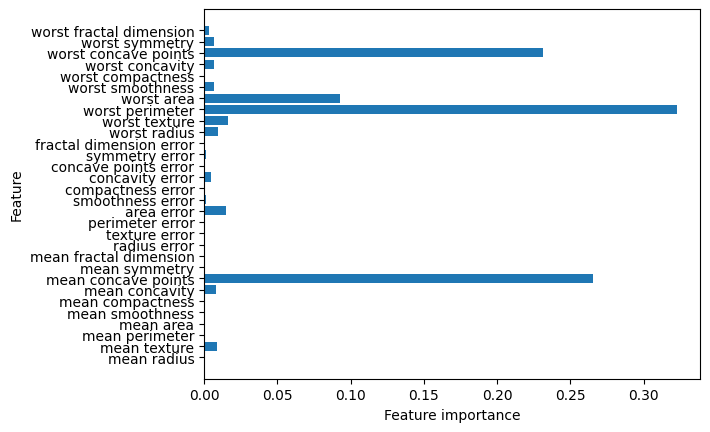

In [32]:
# 勾配ブースティング回帰木による特徴量の重要度
# 特徴量の重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("n_estimators: {}".format(gbrt.n_estimators_))
plot_feature_importances_cancer(gbrt)

## 勾配ブースティング回帰木の利点・欠点・パラメータ
- 利点
    - ランダムフォレストと同じようなデータを得意とする（より頑健なランダムフォレストを先に試した方が良い）
        - ランダムフォレストよりも予測時間が短い、パラメータの調整によっては性能を向上できる
    - xgboostパッケージを使えば、scikit-learnよりも高速でチューニングが容易にできる
    - 教師あり学習の中で最も強力で広く使われている
    - 特徴量のスケール変換をする必要がなく、２値特徴量と連続値特徴量が混在していてもうまく機能する
- 欠点
    - パラメータチューニングに細心の注意が必要
    - 訓練に必要な時間が長い
    - 高次元の疎なデータに対してはあまりうまく機能しない
- パラメータ
    - 予測器の個数：n_estimators → 時間とメモリのある限り大きくする
        - 大きくしすぎると複雑なモデルになり過学習を招く
    - 個々の決定木がそれまでの決定木の誤りを補正する度合い（学習率）：learning_rate
        - 小さくすると同じ複雑さのモデルを作るには多くの予測器が必要になる
    - 実行時間とメモリ量に応じてn_estimatorsを決定しておき、learning_rateを探索すると良い
    - 事前枝刈り：max_depth, max_leaf_nodes, min_samples_leaf → 訓練や予測にかかる時間を縮める効果もある